In [226]:
import pandas as pd
import numpy as np
dataframe=pd.read_csv('train.csv')
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
#dataframe

In [227]:
dataframe.columns

Index(['Unnamed: 0', 'ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE',
       'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1',
       'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
       'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default payment next month'],
      dtype='object')

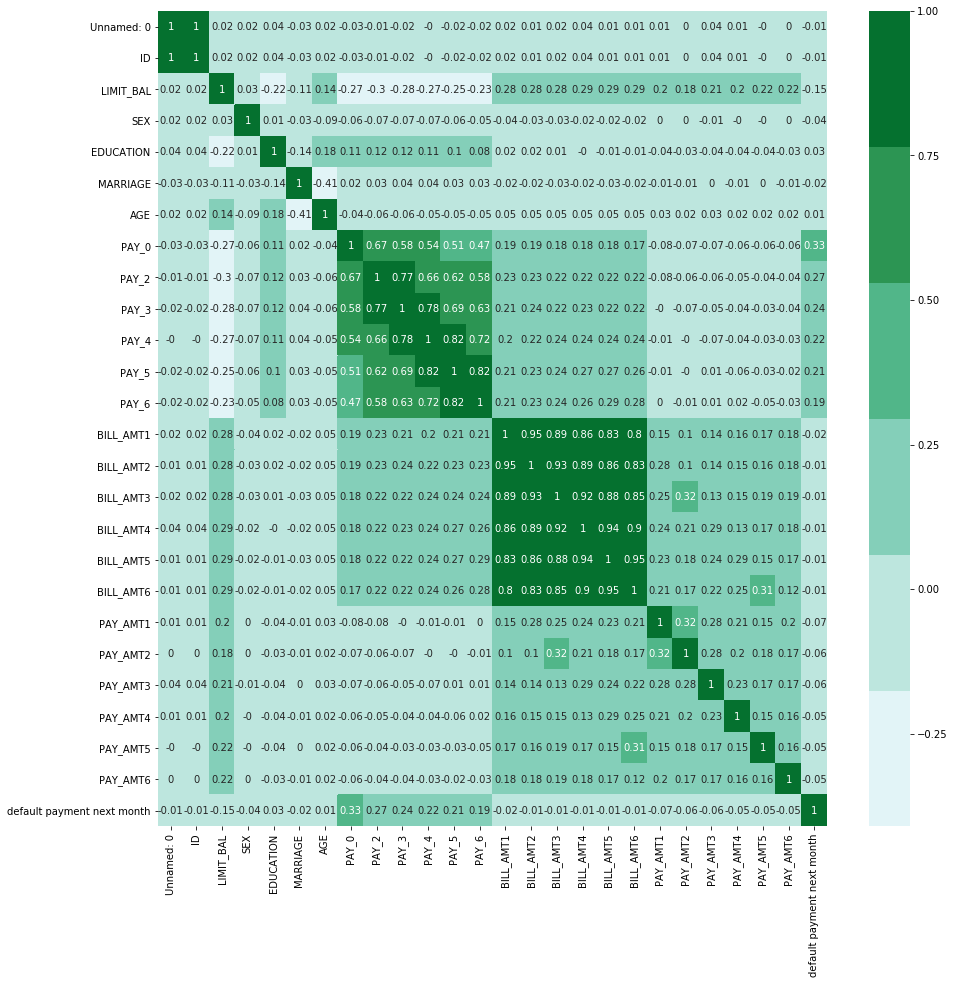

In [228]:
plt.figure(figsize=(15,15))
cor = round(dataframe.corr(),2)
sns.heatmap(cor, cmap = sns.color_palette('BuGn'), annot = True)

Pay features and limit balance more contrubuting to decide defaulter or not

In [229]:
def pay_mean(PAY_NUM):
    temp = dataframe[[PAY_NUM, 'default payment next month']].groupby([PAY_NUM], as_index = True).mean()
    pay_mean = temp['default payment next month']
    return pay_mean

In [230]:
pay_means = {}
for i in ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']:
    pay_means[i] = pay_mean(i)
pay_means_results = pd.DataFrame(pay_means)
#pay_means_results.reset_index(level=0, inplace=True)
pay_means_results

,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6
-2,0.127099,0.177873,0.179699,0.188886,0.191566,0.195278
-1,0.160190,0.155141,0.150518,0.153813,0.159724,0.165556
0,0.126495,0.157313,0.172966,0.181736,0.186736,0.187419
1,0.341927,0.250000,0.333333,0.500000,NaN,NaN
2,0.690286,0.557925,0.516996,0.522950,0.537299,0.502927
3,0.769811,0.619608,0.557292,0.591241,0.637037,0.644295
4,0.704918,0.476190,0.507937,0.660000,0.583333,0.589744
5,0.478261,0.565217,0.470588,0.448276,0.500000,0.454545
6,0.545455,0.666667,0.555556,0.400000,0.750000,0.714286
7,0.666667,0.562500,0.809524,0.829787,0.829787,0.815789


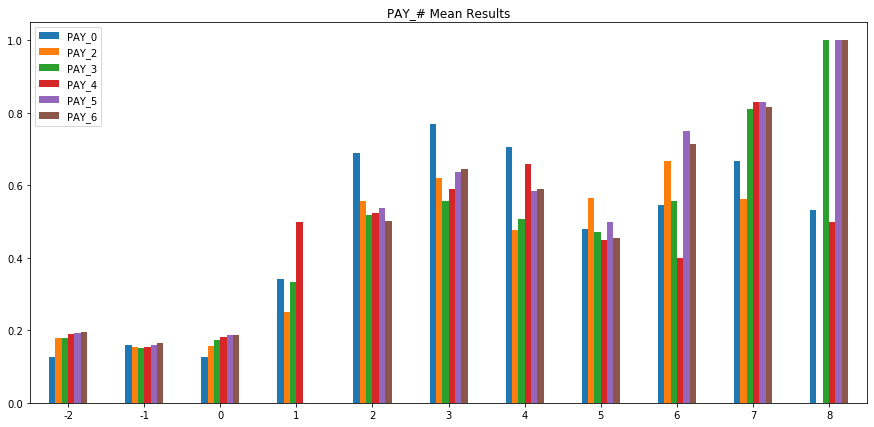

In [231]:
pay_means_results.plot(kind = 'bar', title = 'PAY_# Mean Results', figsize=(15, 7), legend=True, rot = 0)

Those who paid duely are less likely to default next month , those who paid late are more likely to default next month

/opt/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.05, 'Limit Balance and Default Rate Distribution')

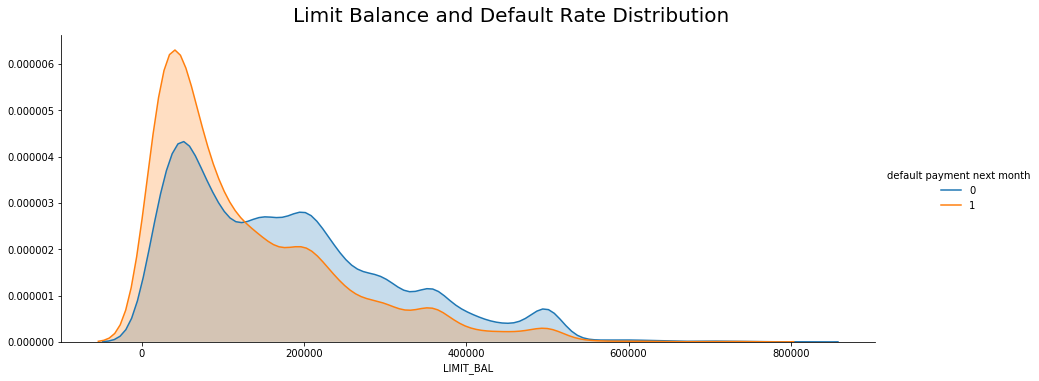

In [232]:
age_survival_dist = sns.FacetGrid(dataframe, hue = 'default payment next month', aspect = 2.5, size = 5)
age_survival_dist.map(sns.kdeplot, 'LIMIT_BAL', shade = True)
age_survival_dist.add_legend()
plt.suptitle('Limit Balance and Default Rate Distribution', fontsize = 20, y = 1.05)

Those with low limit balance more likely to default than those with high limit balance

In [233]:
target = dataframe['default payment next month']

In [234]:
dataframe.drop(['ID','default payment next month'],axis=1,inplace=True)

In [235]:
dataframe.head()

,Unnamed: 0,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,0,20000,2,2,1,24,2,2,-1,-1,...,689,0,0,0,0,689,0,0,0,0
1,2,90000,2,2,2,34,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
2,3,50000,2,2,1,37,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
3,4,50000,1,2,1,57,-1,0,-1,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679
4,5,50000,1,1,2,37,0,0,0,0,...,57608,19394,19619,20024,2500,1815,657,1000,1000,800


In [236]:
#Normalizing dominant features
#means,stds=dataframe.mean(axis=0),dataframe.std(axis=0)
#print(means)
#print(stds)
#dataframe.columns[11:]
#dataframe.iloc[:,0]=(dataframe.iloc[:,0]-means[0])/stds[0]
#dataframe.iloc[:,4]=(dataframe.iloc[:,4]-means[4])/stds[4]
#dataframe.iloc[:,11:]=(dataframe.iloc[:,11:]-means[11:])/stds[11:]
#dataframe.head()

In [237]:
#np.corrcoef(dataframe['PAY_AMT6'],dataframe['default payment next month'])

In [238]:
clf = RandomForestClassifier(n_estimators=100, random_state=0)

In [239]:
X_train, X_val, y_train, y_val = train_test_split(dataframe, target, test_size=0.3,random_state=42)

In [240]:

clf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [241]:
#clf.feature_importances_

In [242]:
y_pred=clf.predict(X_val)
y_pred

array([0, 1, 1, ..., 0, 0, 0])

In [243]:
f1_score(y_val, y_pred,pos_label =1, average='binary')

0.4609120521172638

In [244]:
logr=LogisticRegression(penalty='l1', C=30.0)
logr.fit(X_train,y_train)

LogisticRegression(C=30.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l1', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [245]:
y_pred_lgr=logr.predict(X_val)
y_pred_lgr

array([0, 0, 0, ..., 0, 0, 0])

In [246]:
f1_score(y_val, y_pred_lgr,pos_label =1, average='binary')

0.36185133239831696

In [247]:
knnModelCls = KNeighborsClassifier
knnModel=knnModelCls(n_neighbors=3)
knnModel.fit(X_train,y_train)
y_pred_knn=knnModel.predict(X_val)
y_pred_knn

array([0, 0, 1, ..., 0, 0, 0])

In [248]:
f1_score(y_val, y_pred_knn,pos_label =1, average='binary')

0.256468797564688

In [249]:
gnbModel=GaussianNB()
gnbModel.fit(X_train,y_train)
y_pred_gnb=gnbModel.predict(X_val)
y_pred_gnb

array([0, 1, 1, ..., 1, 0, 1])

In [250]:
f1_score(y_val, y_pred_gnb,pos_label =1, average='binary')

0.37674604230411063

In [251]:
xgbModel=GradientBoostingClassifier(loss='deviance', learning_rate=0.2, n_estimators=150,min_samples_split=3,max_depth=3)
xgbModel.fit(X_train,y_train)
y_pred_xgb=xgbModel.predict(X_val)
y_pred_xgb

array([0, 1, 0, ..., 1, 0, 0])

In [252]:
f1_score(y_val, y_pred_xgb,pos_label =1, average='binary')

0.4618490109002826

XGboost is the best model with 46% f1 score

In [253]:
testData = pd.read_csv('test.csv')
testData.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,1,2,120000,2,2,2,26,-1,2,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
1,9,10,20000,1,3,2,35,-2,-2,-2,...,0,0,13007,13912,0,0,0,13007,1122,0
2,11,12,260000,2,1,2,51,-1,-1,-1,...,9966,8517,22287,13668,21818,9966,8583,22301,0,3640
3,28,29,50000,2,3,1,47,-1,-1,-1,...,3416,2040,30430,257,3415,3421,2044,30430,257,0
4,31,32,50000,1,2,2,33,2,0,0,...,22102,22734,23217,23680,1718,1500,1000,1000,1000,716


In [254]:
X_testData=testData.drop(['ID'],axis=1)

In [255]:
y_test_pred=xgbModel.predict(X_testData)
y_test_pred

array([0, 0, 0, ..., 1, 1, 0])

In [256]:
testData['Prediction']=y_test_pred
testData.head()

,Unnamed: 0,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Prediction
0,1,2,120000,2,2,2,26,-1,2,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,0
1,9,10,20000,1,3,2,35,-2,-2,-2,...,0,13007,13912,0,0,0,13007,1122,0,0
2,11,12,260000,2,1,2,51,-1,-1,-1,...,8517,22287,13668,21818,9966,8583,22301,0,3640,0
3,28,29,50000,2,3,1,47,-1,-1,-1,...,2040,30430,257,3415,3421,2044,30430,257,0,0
4,31,32,50000,1,2,2,33,2,0,0,...,22734,23217,23680,1718,1500,1000,1000,1000,716,0


In [257]:
testData.to_csv('predicted_test1.csv')